# 【AI_STANDARD | 実践課題 vol.4】 Wholesale customers（問題編）

#### 課題概要

- 範囲: Machine Learning vol.12, 13
- 目標: 教師なし学習手法を実装し､施策提言までのステップを体験する｡

今回の課題は**Wholesale Customers（小売店舗の顧客データ）**です｡こちらが機械学習講座最後の課題となります｡また､今回は**教師なし学習手法の扱い以外に､データを観察する姿勢･主張を組み立てる姿勢を養うことを重視**しました｡　**<font color=red>様々な視点からデータを眺め､出力結果から仮説を立て､その検証を行い､検証結果をもとに主張を組み立てる</font>**という流れで分析を行います｡ただのデータからこれほどの知識を抽出することができるのかということを実感してもらえるはずです｡ボリュームもありますが､機械学習講座の総仕上げにふさわしい課題となっていますので､腰を据えて取り組んでみてください｡

### 目次

[**4.1 分析ストーリー**](#4.1-分析ストーリー)

[**4.2 データの観察**](#4.2-データの観察)
- 4.2.1 ファイルの読み込み
- 4.2.2 データの整形
- 4.2.3 基礎的な統計解析

[**4.3 機械学習のための前処理①**](#4.3-機械学習のための前処理①)
- 4.3.1 エンコーディング
- 4.3.2 標準化

[**4.4 主成分分析**](#4.4-主成分分析)
- 4.4.1 学習の実行
- 4.4.2 学習結果の解釈
- 4.4.3 学習結果の可視化

[**4.5 機械学習のための前処理②**](4.5-機械学習のための前処理②)

[**4.6 クラスタリング**](4.6-クラスタリング)
- 4.6.1 学習の実行
- 4.6.2 学習結果の解釈
- 4.6.3 学習結果の可視化

[**4.7 分析結果のレポーティング**](4.7-分析結果のレポーティング)

## 4.1 分析ストーリー: 食品小売店舗の出店戦略

とある企業が**<font color='red'>人口の多い都市に中小規模の食品小売店舗を出店しようとしているとします</font>**｡しかし､そうした都市には既に競合店舗も多く出店されているため､そうした環境の中でいかに売上を､ひいては利益を上げていけるかということが問題になります｡  

こうした場合､教師なし学習の手法が役に立ちます｡**<font color='red'>教師なし学習は既知のデータの構造を浮かび上がらせるために用いられる</font>**と説明しました｡この場合では､これを用いて市場環境の構造化が行えます｡アンケートデータなどを用いて､**既存の店舗をよく説明する軸を抽出し（主成分分析）､同質の店舗をグループにまとめる（クラスタリング）**ことを試しましょう｡また､今回は周辺の店舗の売上構成のデータが得られたという想定で分析を行います（実際には､こうしたデータが手に入るケースは稀ですが）｡  

そして､今回は教師なし学習の手法による分析を行うだけでは終わりません｡**<font color='red'>この企業の出店戦略に対して､具体的な施策の提言を行う</font>**ところまでを今回の課題とします｡最後に簡単な**レポーティングの課題**を用意しましたので､それを完成させて､回答例と照らし合わせてみてください｡

<img src='https://s3.us-east-2.amazonaws.com/ai.standard/Machine+Learning/Machine+Learning/vol.13+%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88+2018-01-03+12.51.34.png' width=70%>

## 4.2 データの観察

次はデータの理解です｡まずはデータの読み込みを行います｡**Wholesale Customers**のデータセットは､**UCI Machine Learning Repository（カリフォルニア大学アーバイン校が運営する､機械学習用のデータ配布サイト）**で配布されています｡

<img src='https://s3.us-east-2.amazonaws.com/ai.standard/Machine+Learning/Machine+Learning/vol.13+%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88+2018-01-02+11.11.06.png' width=80%>

掲載: [UCI, "Wholesale customers Data Set"](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  

出典: Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal  

参考: [Enhancing the selection of a model-based clustering
with external categorical variables](https://arxiv.org/pdf/1211.0437.pdf)

In [1]:
# モジュールをインポート
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
% matplotlib inline

### 4.2.1 ファイルの読み込み

さて､それでは早速Wholesale Customersのデータセットを読み込みましょう｡

#### 問題1: csvファイルの読み込み
pandasのメソッドを利用して､以下のURLに保存されたcsvファイルを読み込んでください｡

URL : https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

In [2]:
# pandasのライブラリを用いて､csvファイルを読み込む
df = pd.

In [3]:
# 初めの5行のみを表示して､csvファイルが読み込まれたことを確認
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


csvファイルを正常に読み込めたら､内容の確認に移りましょう｡それぞれの変数の意味を以下の表にまとめておきました｡**小売店舗ごとの（各サンプルは店舗を表しています）食品の売上データが､カテゴリ別に記載されたデータ**であるようです｡それぞれの名称と意味をしっかりと覚えておいてください｡  

注意すべきは**"Grocery"の意味**です｡Groceryは､MilkやFreshなどを含め食料品店で買えるもの全般を指す単語なのですが､ここでは食料品の一カテゴリとして扱われているようです｡論文にも詳細な記述がなかったので､今回は**｢他のカテゴリを除く食料雑貨全般の年間売上｣**として扱うことにします｡**<font color=red>第三者から提供されたデータを分析するときは､こうした言葉の定義にも注意する必要があります<font>**｡

|index|名称|意味|
|:--|:--|:--|:--|
|0|Channel|販売チャネル（1: Horeca (ホテル･レストラン･カフェ), 2: Retail（個人向け小売））|
|1|Region|所在地（1: リスボン市, 2: ポルト市, 3: その他）|
|2|Fresh|生鮮品の年間売上 [単位: ユーロ]|
|3|Milk|乳製品の年間売上 [単位: ユーロ]|
|4|Grocery|他のカテゴリを除く食料雑貨全般の年間売上 [単位: ユーロ]|
|5|Frozen|冷凍食品の年間売上 [単位: ユーロ]|
|6|Detergents_Paper|洗剤と紙類の年間売上 [単位: ユーロ]|
|7|Delicassen|惣菜の年間売上 [単位: ユーロ]|

#### 問題2: サンプル数の確認

pandasのメソッドを利用して､サンプル数を出力してください｡  
（ヒント: サンプル数を出力することは､データフレームの長さを出力することと同じです｡）

In [4]:
# サンプル数の確認


440

#### 問題3: 欠損の個数を確認

pandasのメソッドを利用して､特徴量ごとの欠損の個数を確認してください｡

In [5]:
# 欠損の個数を確認
df.

Channel             440
Region              440
Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicassen          440
dtype: int64

### 4.2.2 データの整形

#### 年間売上高の合計を算出

さて､現在は商品のカテゴリ別の売上高が記載されていますが､**<font color='red'>本当に重要なのは合計の売上高です</font>**（**営業利益**などがあると更に良いのですが）｡そこで､各カテゴリの売上高を合計して､店舗ごとの年間の売上高を算出します｡そして､それをデータフレームの列に加えておきましょう｡

In [6]:
# 各サンプルのFresh, Milk, Grocery, Frozen, Detergents_paper, Delicassenを合計
# axisで列（0）の合計を取るか､行（1）の合計を取るかを指定
df_sum = df.iloc[:,2:8].sum(axis=1)

# sum関数の出力がSeries型になってしまうので､DataFrame型に戻す
df_sum = pd.DataFrame(df_sum)
# カラム名を与える
df_sum.columns = ['Sum']

df_sum.head()

,Sum
0,34112
1,33266
2,36610
3,27381
4,46100


#### 問題4: データフレームの結合
新たに作られたSumの列を､dfの右側から結合してください｡

In [7]:
# dfのカラムを接続
df = pd.
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


#### 通貨単位をユーロから千円に変換

このデータの通貨単位はユーロです｡このままだといまいち直感的に理解できないので､**通貨単位を円に変換**してみましょう｡ひとまず､データが寄贈された2014年3月31日の為替相場で変換してみます｡1ユーロが約141.65円です｡また､円に換算したときの単位は会計の規則に倣って千円とします｡  

ところで､下のセルの変数名はdf_kyenとなっていますが､**このkはkilo（キロ）の頭文字で1000を意味します**｡｢キロ円｣で千円ということです｡キログラムやキロメートルのキロと同じで､**<font color='red'>些末な桁を切り捨てることで､データを見やすくする</font>**ことを目的としています｡

<img src='https://s3.us-east-2.amazonaws.com/ai.standard/Machine+Learning/Machine+Learning/vol.13+%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88+2018-01-02+11.44.50.png' width=50%>

In [8]:
# 単位をユーロから千円に変換

# dfのコピーを生成
# df_kyen = dfだと､dfの呼び名を増やしているだけでコピーが生成されないので注意
df_kyen = df.copy()

# ChannelとRegionを除いた列について変換を施す
# 為替レートをかけ算して､1000で割り算
df_kyen.iloc[:,2:9] = df_kyen.iloc[:,2:9] * 141.65 / 1000
# 小数点以下を切り捨て
df_kyen = df_kyen.astype(int)

df_kyen.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
0,2,3,1794,1367,1071,30,378,189,4831
1,2,3,999,1389,1355,249,466,251,4712
2,2,3,899,1247,1088,340,498,1111,5185
3,1,3,1878,169,597,907,71,253,3878
4,2,3,3203,766,1019,554,251,734,6530


### 4.2.3 基礎的な統計解析

#### 問題5: 基本統計量を出力

pandasのメソッドを利用して､基本統計量を出力してください｡  
※基本統計量の後に}**.astype(int)**をつけることで､小数点以下を切り捨てられます｡

In [9]:
# 基本統計量を出力
df_kyen.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
count,440,440,440,440,440,440,440,440,440
mean,1,2,1699,820,1125,434,407,215,4705
std,0,0,1791,1045,1346,687,675,399,3733
min,1,1,0,7,0,3,0,0,128
25%,1,2,442,216,304,104,36,57,2471
50%,1,3,1204,513,673,215,115,136,3893
75%,2,3,2398,1018,1509,502,555,257,5851
max,2,3,15886,10410,13142,8622,5783,6791,28314


ChannelとRegionを除いた変数について基本統計量を観察します｡ChannelとRegionについては､One-Hotエンコーディングを施した後の方が観察しやすいので､そのときに観察します｡  

全店舗の平均を見ると､年間売上は生鮮食品が約170万円､牛乳が約82万円､食料雑貨が約113万円､冷凍食品が43万円､洗剤や紙類が約41万円､惣菜が40万円､食料品合計が約471万円になるということがわかります｡しかし､標準偏差がかなり大きいこともわかります｡**標準偏差が平均よりも大きい変数も多く､売上規模にかなりのばらつきがある**ことがわかります｡これは､**<font color=red>データの分布についての観察を行うことが非常に重要</font>**だということを意味します｡

#### 問題6: Sumについてヒストグラムを出力

データの分布についての観察の最も簡単なものとして､ヒストグラムを出力してみましょう｡   
また､観察するべき変数は店舗の売上総額を表すSumとします｡    

**※ 今回はヒストグラムのbinsを15としてください**

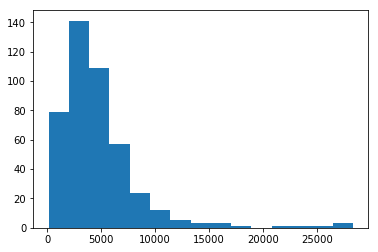

In [10]:
# sumについてヒストグラムを出力
plt.
plt.show()

ヒストグラムを観察すると､ほとんどの店舗が売上合計1000万円以下に集中していることがわかります｡ちなみに､平均は471万円（4710千円）です｡**今回はサンプルのほとんどが中小規模の店舗だといえます**｡また､一方で2000万円以上の店舗も存在します｡大規模な総合スーパーでしょうか｡

#### 売上総額15,000千円以上の大型店舗を抽出

さて､ヒストグラムによって**平均から大きく外れた大規模店舗が一定数存在する**ことが明らかになりました｡**中小規模の出店戦略を考えるとき､大型店舗に顧客を取られてしまうというケースは想定しておかなければならない**でしょう｡このデータ分析より更に進んだ追加調査を行うときのために､売上総額が15,000千円以上の店舗を抽出しておきましょう｡

In [11]:
# 食品の売上総額が15,000千円以上の店舗を抽出
df_large = df_kyen[df_kyen.Sum > 15000]
df_large

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
23,2,3,3735,5159,3118,730,614,2340,15698
47,2,3,6298,7685,7871,1102,3423,915,27297
61,2,3,5091,5434,8442,460,3782,285,23497
85,2,3,2282,6543,13142,145,5783,417,28314
86,2,3,3247,10410,4548,139,2842,127,21317
181,1,3,15886,4196,2570,2371,700,1211,26937
183,1,3,5219,6225,2857,5175,33,6791,26301
211,2,1,1716,4012,5622,670,2749,406,15178
325,1,2,4634,2377,1930,8622,180,794,18538
333,2,2,1213,705,9532,18,5397,172,17039


ChannelがRetailになっている店舗がやや多めでしょうか｡Horecaの大規模店舗はFreshやFrozenを主力商品にしているようです｡  
また､47番のサンプルは小売り店舗でありながら､Horecaのような売上構成のようです｡こうした店舗も存在します｡

#### 問題7: 相関行列のヒートマップを確認

続いて､各変数同士の関係性を見ていきます｡まずは､各特徴量どうしの相関係数を確認しましょう｡直感的に観察できるように､ヒートマップの形式で出力しましょう（参考: [**相関係数行列の観察**](https://ai-std.com/show_ml/ml3.html#%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0%E8%A1%8C%E5%88%97%E3%81%AE%E8%A6%B3%E5%AF%9F)）｡ただし､ChannelとRegionは列のスライシングで除いておいてください｡**<font color='red'>これらの名義特徴量はエンコーディングがまだなので､意味のない数値が出力されてしまいます</font>**｡

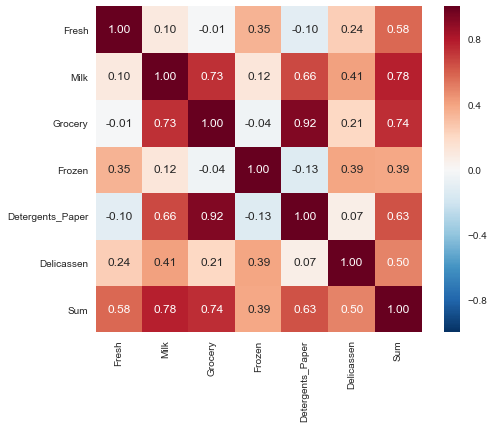

In [12]:
# 相関係数行列のヒートマップの出力
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.
plt.show()

### 出力結果から､相関が強い（絶対値が0.7以上）変数のペアを列挙します｡  
- SumとMilk（0.78）
- SumとGrocery（0.74）
- GroceryとDetergents_Paper（0.92）
- GroceryとMilk（0.73）

まとめると､**Milk､Grocery､Detergents_paperの3つはSumと強い正の相関がある**ようです｡そもそも､Sumは各食品カテゴリの売上を合計しただけですので､すべてのカテゴリとある程度は正の相関があるはずです｡ここからわかるのは､**大規模な店舗は多数あるカテゴリの中でも牛乳､食料雑貨､洗剤や紙類を中心に売上を上げている**ということです｡  

これらのカテゴリは生活の中心になっているものと言ってもいいでしょう｡食料雑貨全般が食べられ､牛乳を飲んで､水回りも整えられ､という3点を押さえています｡大量に販売できるということは､原価を押さえて安値で提供しているかもしれません｡その場合は､大規模な店舗の周辺に何の工夫もなしに同カテゴリの商品を主力とする店舗を出店することは危険かもしれません｡  

**※注意**  
それにしても､GroceryとDetergents_Paperのような､**0.9を超える相関は高すぎ**です｡通常､これほど高い相関はあまり観察されません.特に､今回はGroceryの定義が曖昧だったこともあり､データの取り方にミスがあった可能性も考えられます｡

#### 問題8: 散布図行列を確認

さらに､散布図行列を確認します｡**<font color='red'>相関係数だけでは､曲線的な関係性の強さを見落とすことになりかねません</font>**｡  
また､ChannelとRegionは列のスライシングで除いておいてください｡

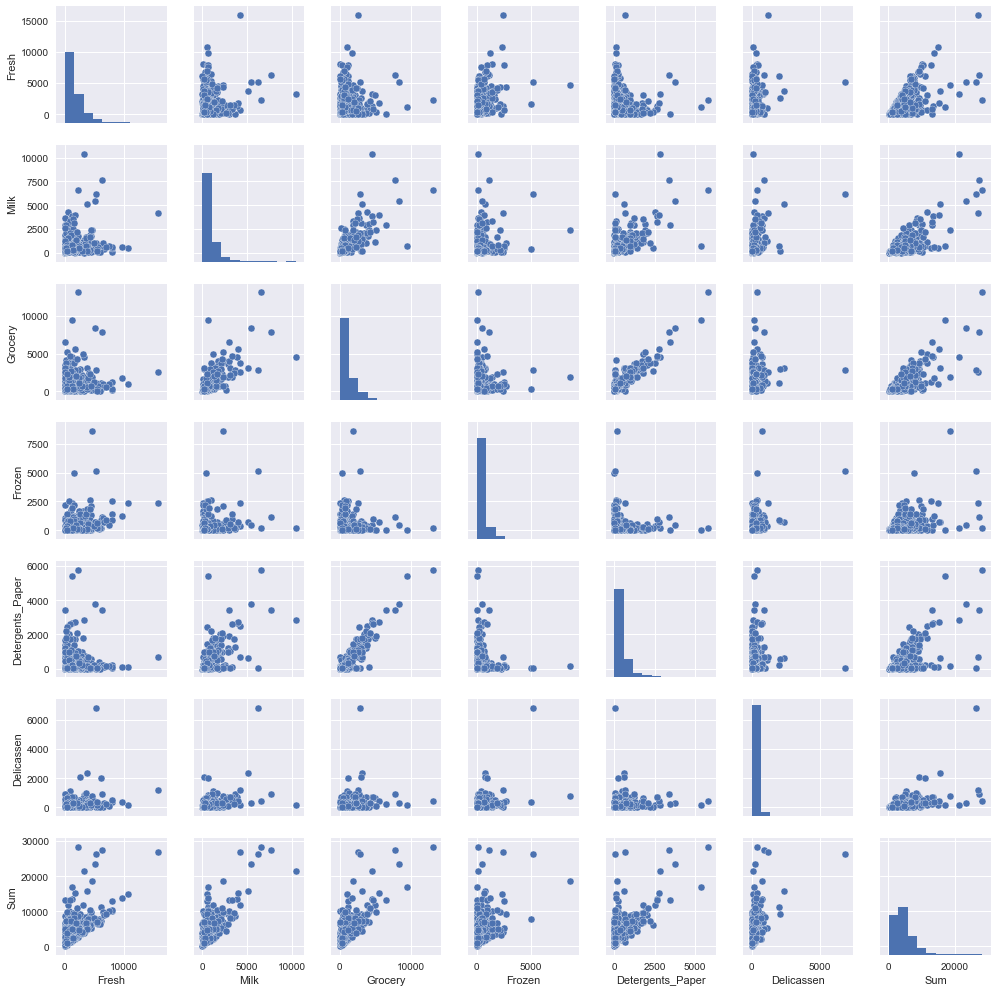

In [13]:
# 散布図行列を出力
import seaborn as sns
sns.
plt.show()

散布図行列を見るに､Sumと曲線的な関係が著しく強い変数はないようです｡

#### Channelで層別したヒストグラム

続いて､ChannelとRegionにも触れていきましょう｡**これらのカテゴリ変数に大きな傾向の違いはあるのでしょうか**｡ 
まずは､Channelごとに**<font color='red'>層別したヒストグラム</font>**を出力して､分布に大きな違いがあるかを観察します｡

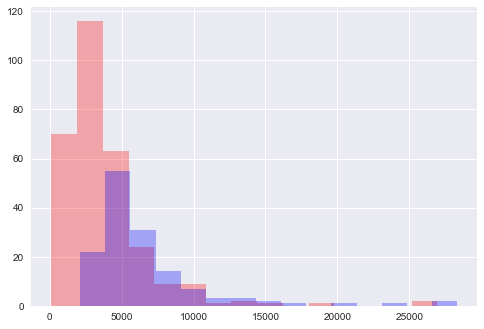

In [14]:
# Channelで送別したヒストグラムを出力
plt.hist(df_kyen[df_kyen.Channel==1]['Sum'], bins=15, alpha=0.3, color='red') # 販路がHorecaのサンプルを赤で表示
plt.hist(df_kyen[df_kyen.Channel==2]['Sum'], bins=15, alpha=0.3, color='blue') # 販路がRetailのサンプルを青で表示
plt.show()

Retailの方が年間売上がやや高めなようです｡小売店舗の方が､ホテル､レストラン､カフェよりもまとまった量の食料品を購入するのでしょうか｡

#### Regionごとに層別したヒストグラム
次に､Regionごとの層別です｡

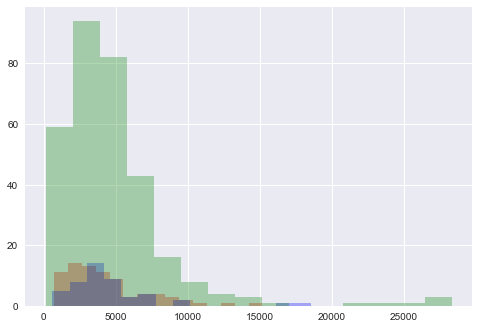

In [15]:
# Regionごとに層別したヒストグラムを出力
plt.hist(df_kyen[df_kyen.Region==1]['Sum'], bins=15, alpha=0.3, color='red')
plt.hist(df_kyen[df_kyen.Region==2]['Sum'], bins=15, alpha=0.3, color='blue')
plt.hist(df_kyen[df_kyen.Region==3]['Sum'], bins=15, alpha=0.3, color='green')
plt.show()

こちらは分布の違いはないものの､サンプル数に大きな違いがあることがわかりました｡リスボン市とポルト市は同程度のサンプル数ですが､その他があまりにも多いので､これらの情報がほとんど意味をなしません｡**リスボン市もポルト市も､その他の一部であるとして観察しても差し支えなさそう**です｡

## 4.3 機械学習のための前処理①

### 4.3.1 エンコーディング

#### 問題9: ChannelへのOne-Hotエンコーディング

続いて､ChannelとRegionをOne-Hotエンコーディングを施してください｡これらはあらかじめ数値で表現されています｡なので､マッピングは必要ありません｡One-Hotエンコーディングだけ施しましょう｡

In [16]:
# ChannelにOne-Hotエンコーディングを施す
channel = pd.

In [17]:
# わかりやすいように､列の名称を変更する
channel.columns = ['Horeca', 'Retail']
channel.head()

,Horeca,Retail
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


#### 問題10: RegionへのOne-Hotエンコーディング

Regionに対しても同様の処理を施します｡

In [18]:
# RegionにOne-Hotエンコーディングを施す
region = pd.

In [19]:
# わかりやすいように､列の名称を変更する
region.columns = ['Lisnon', 'Opotro', 'Other']
region.head()

,Lisnon,Opotro,Other
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


#### 問題11: データフレームへの反映

df_kyen内のChannelとRegionをOne-Hotエンコーディングを施したものに入れ替えてください｡

In [20]:
# いったんChannelとRegionをdf_kyenから削除
del(df['Channel'])
del(df['Region'])

In [21]:
# dfとchannelとregionを接続
df_onehot = pd.
df_onehot.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum,Horeca,Retail,Lisnon,Opotro,Other
0,12669,9656,7561,214,2674,1338,34112,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,33266,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,36610,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,27381,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,46100,0,1,0,0,1


#### 問題12: One-Hotエンコーディングを施したデータの基本統計量

**<font color='red'>One-Hotエンコーディングを施していると､meanから定量的データの存在割合がわかります</font>**｡たとえば､Channelは $Horeca:Retail = 68:32$ になっているようです｡同様に､Regionは $Lisnon:Oporto:Other = 18:11:72$ です｡

In [22]:
# 基本統計量を再度出力
df_onehot.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum,Horeca,Retail,Lisnon,Opotro,Other
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364,0.677273,0.322727,0.1750,0.106818,0.718182
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730,0.468052,0.468052,0.3804,0.309234,0.450397
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000,1.000000,0.000000,0.0000,0.000000,1.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000,1.000000,1.000000,0.0000,0.000000,1.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000,1.000000,1.000000,1.0000,1.000000,1.000000


#### 問題13: One-Hotエンコーディングを施したデータの相関係数行列

続いて､**<font color='red'>相関係数行列</font>**も同様に出力してみます｡今回はすべての変数について算出します｡

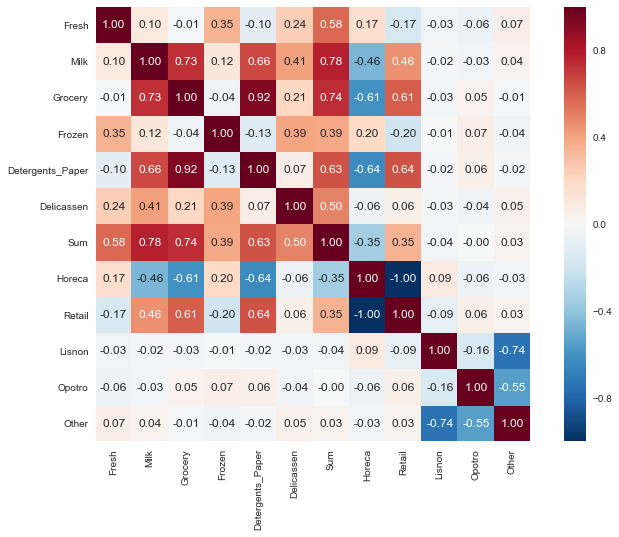

In [24]:
# 相関係数行列のヒートマップの出力
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.
plt.show()

案の定､Regionに関してはほとんど相関がありません｡やはり､この変数は削除してしまって良いでしょう｡  

一方で､Channelの方には有用な情報がありそうです｡HorecaとRetailは0と1が各サンプルで逆に対応しているので､その他の各変数に対して､相関係数の絶対値が同じで符号が反転した状態になっています｡**Retailはサンプル数こそ少ないものの､Horecaよりも売上規模が若干大きく､GroceryやDetergents_Paperを中心に販売しているようです**｡

### 4.3.2 標準化

次に､標準化の処理を実行します｡テキストではアレイ形式の処理を学びましたが､**データフレーム形式でも標準化の処理を行うことができます**｡単純に､**平均を引き算して､標準偏差で割り算をする**というやり方で大丈夫です｡平均がほぼ0に､標準偏差がほぼ1になっていれば大丈夫です｡  

また､先程One-Hotエンコーディングを施したChannelとRegionは主成分分析には使用せず､このデータフレームを入力のXとします｡今回は食料品カテゴリだけで傾向を分析してみましょう｡

In [25]:
# データフレームの状態で標準化を行う
# 列ごとの平均を引いて､標準偏差で割る
X = (df_onehot.iloc[:, 0:7] - df_onehot.iloc[:, 0:7] .mean()) / df_onehot.iloc[:, 0:7] .std()
X.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Sum
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-5.677277e-17,-6.055762e-17,-6.257621e-17,3.658690e-17,5.500650e-17,-1.135455e-17,6.661338e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.486033e-01,-7.779096e-01,-8.363823e-01,-6.276286e-01,-6.037292e-01,-5.396501e-01,-1.226353e+00
25%,-7.015353e-01,-5.776488e-01,-6.101418e-01,-4.798844e-01,-5.505082e-01,-3.959498e-01,-5.986191e-01
50%,-2.764455e-01,-2.939234e-01,-3.362856e-01,-3.184420e-01,-4.331074e-01,-1.983509e-01,-2.175623e-01
75%,3.900786e-01,1.888771e-01,2.845866e-01,9.935132e-02,2.182338e-01,1.047406e-01,3.066198e-01
max,7.918724e+00,9.173208e+00,8.926367e+00,1.190545e+01,7.958613e+00,1.645971e+01,6.323530e+00


## 4.4 主成分分析

### 4.4.1 学習の実行

#### 問題14: 主成分の取得

主成分分析を行い､第5主成分までを取り出しましょう｡

In [26]:
# 主成分分析を実行
# 第5主成分まで取得
from sklearn.decomposition import PCA
pca = 
X_pca = 

In [27]:
# 主成分を初めの5サンプルだけ出力
X_pca[:5]

array([[ 0.13418035, -0.3314565 , -0.1491128 , -0.4868235 ,  0.49477783],
       [ 0.2950609 , -0.45097075,  0.32855985, -0.17623214,  0.36490559],
       [ 0.81010487,  0.47383952,  1.67171322, -1.24301642, -0.37935643],
       [-0.66499483,  0.79657237,  0.16690708,  0.38091784, -0.27597051],
       [ 0.59937645,  1.22302407,  0.1633233 , -0.82641398, -0.39350058]])

#### 問題15: 寄与率の出力

主成分分析の結果から､寄与率を出力してください｡

In [28]:
# 寄与率を出力
# 各主成分の寄与率がarrayの形式で入っている
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print()

[ 0.49639921  0.25950771  0.11368933  0.08054048  0.04081173]


#### 問題16: 累積寄与率の出力

累積寄与率についても同様です｡

In [29]:
# 累積寄与率を出力
# [第1主成分までの累積寄与率 第2主成分までの累積寄与率 ...]
print()

[ 0.49639921  0.75590692  0.86959625  0.95013673  0.99094846]


#### 問題17: 因子負荷量の出力

続いて､因子負荷量を算出してみましょう｡

In [30]:
# 因子負荷量を出力
# Fresh（生鮮品）, Milk（乳製品）, Grocery（食料雑貨）, Frozen（冷凍食品）, Detergents_Paper（衛生用品と紙類）, Delicassen（惣菜）,Sum（総額）
print()

[[ 0.30519436  0.87446281  0.87332798  0.25840955  0.79128844  0.50007678
   0.95046143]
 [ 0.69457122 -0.11962287 -0.41098596  0.73973993 -0.53551008  0.50285599
   0.24479956]
 [-0.62208059  0.13704626 -0.03260958  0.2273501  -0.07178996  0.54424788
  -0.18476931]
 [-0.18510142 -0.06701631  0.07716454  0.57601135  0.12657315 -0.41225952
   0.00511744]
 [-0.02468582  0.44188224 -0.16757287 -0.01453169 -0.18074035 -0.16793181
  -0.00187052]]


### 4.4.2 学習結果の解釈

#### 問題18: 主成分軸の意味付け

因子負荷量から､第1､第2主成分の軸に意味付けを行いましょう｡ただし､**<font color='red'>因子負荷量という指標があるとは言え､あくまで主観である</font>**ということに注意してください｡解答例を用意していますが､**<font color='red'>厳密な正解があるわけではありません</font>**｡

### 4.4.3 学習結果の可視化

#### 問題19: 3次元空間へのプロット

累積寄与率を見ると､**8割方の情報を拾うためには､第3主成分まで拾えば十分**だということがわかりました｡その状態を可視化するため､第3主成分までででつくった空間にデータ点をプロットしてみましょう｡3次元のプロットについては [**3.5.4 回帰平面の可視化**](https://ai-std.com/show_ml/ml3.html#2.-%E5%9B%9E%E5%B8%B0%E5%B9%B3%E9%9D%A2%E3%81%AE%E5%8F%AF%E8%A6%96%E5%8C%96) を参考にしてください｡

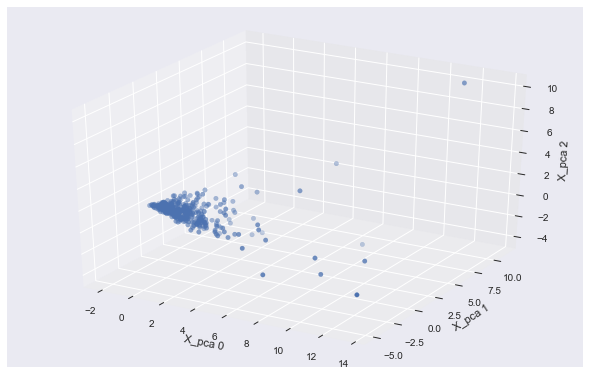

In [31]:
# 3次元のプロットをするためのライブラリを読み込み
from mpl_toolkits.mplot3d import Axes3D

# Axes3Dのインスタンスを生成
ax = Axes3D(plt.figure(figsize=(8, 5)))

# 3次元の散布図を出力
# (x軸, y軸 , z軸)
ax.

# 座標軸のラベルを指定
ax.set_xlabel('X_pca 0')
ax.set_ylabel('X_pca 1')
ax.set_zlabel('X_pca 2')

# ここまでの内容でグラフをプロット
plt.show()

プロットをしてみたところ､**小さくまとまったサンプル群**と**大きくばらついたサンプル群**があることがわかりました｡**<font color='red'>こうしたサンプル群はk-means法でクラスタリングを行う上ではSSEを大きく左右してしまうため､分析が上手く行かない原因になりえます</font>**（参考: [13.6 k-means法の弱点と対策](https://ai-std.com/show_ml/ml13.html#13.6-k-means%E6%B3%95%E3%81%AE%E5%BC%B1%E7%82%B9%E3%81%A8%E5%AF%BE%E7%AD%96)）｡  

<img src='https://s3.us-east-2.amazonaws.com/ai.standard/Machine+Learning/Machine+Learning/vol.13+%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88+2018-01-03+10.35.42.png' width=50%>

なので､今回は**これらのサンプル群を分けて学習を行いましょう**｡小さくまとまったサンプル群はクラスタリングで分析をして､大きくばらついたサンプル群は個別に売上構成を平均と照らし合わせるなどして個別に観察を行います｡  

#### 問題20: 平面でのプロット

さて､それでは2つのサンプル群を分けるための線引をしましょう｡こちらは､第2主成分までをプロットした平面で行いたいと思います｡まずは､横軸に第1主成分を､縦軸に第2主成分を取った平面にデータ点をプロットします｡平面でのプロットは､ [**3.7 グリッド線を表示する**](https://ai-std.com/show_tutorial/pl3.html#3.7-%E3%82%B0%E3%83%AA%E3%83%83%E3%83%89%E7%B7%9A%E3%82%92%E8%A1%A8%E7%A4%BA%E3%81%99%E3%82%8B) を参考にしてください｡

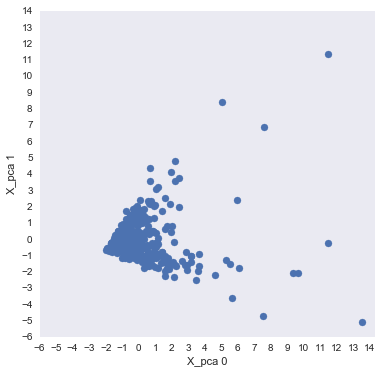

In [32]:
# 平面のプロットを行う
# 出力するグラフのサイズを指定
plt.figure(figsize=(6,6))
# 散布図をプロット
plt.
# 軸ラベルを表示
plt.xlabel('X_pca 0')
plt.ylabel('X_pca 1')
# -4から+15の範囲で､1刻みの目盛りを表示
plt.xticks(np.arange(-6, 15, 1))
plt.yticks(np.arange(-6, 15, 1))
# グリッド線を表示
plt.grid()
# 指示した内容でグラフを描画
plt.show()

## 4.5 機械学習のための前処理②

#### 規格わけの規準を決める

今回は､上記のプロットで以下のような規格で線引きをしたいと思います｡数式は､下の図にプロットしてある範囲を表しています｡第一主成分が売上総額を表しているとすれば､大型店舗のサンプルを除外していることになります｡つまり､**<font color='red'>これから行われるクラスタリングは､中小規模の店舗のグループ分けを行うことになります</font>**｡データの観察のところで大規模店舗は一通り洗い出しておきましたので､ここで中小企業の店舗の分析を行いましょう｡

- 小さくまとまったサンプル群（規格内）･･･ $X\_pca[i,0] \leqq 5$
- 大きくばらついたサンプル群（規格外）･･･それ以外

<img src='https://s3.us-east-2.amazonaws.com/ai.standard/Machine+Learning/Machine+Learning/vol.13+%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88+2018-01-04+14.33.42.png' width=40%>

#### 規格分け

それでは早速､規格内のサンプル群を抽出しましょう｡numpyの**where**メソッドを利用して､条件を満たすサンプルのインデックスを抽出できます｡

In [33]:
# 規格内のサンプルのインデックスを抽出する
id = np.where(X_pca[:,0] <= 5)

# インデックスの指定で､条件を満たすサンプルのみを抽出
X_pca_within_std = X_pca[id] 

In [34]:
# 規格内のサンプル数を確認
print(X_pca_within_std.shape)

(427, 5)


規格内のサンプルは**427店舗**となりました｡全体のサンプル数は440ですので､規格外の大型店舗は**13店舗**あることになります｡

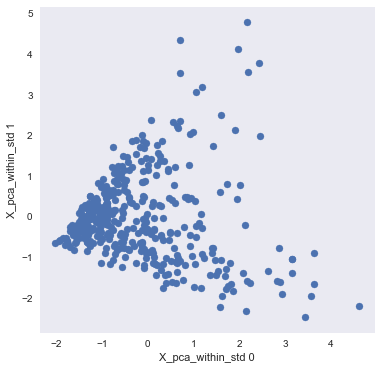

In [35]:
# 第二種成分までで平面のプロットを行う
# 規格内のサンプルのみ
plt.figure(figsize=(6,6))
plt.scatter(X_pca_within_std[:,0], X_pca_within_std[:,1])
plt.xlabel('X_pca_within_std 0')
plt.ylabel('X_pca_within_std 1')
plt.grid()
plt.show()

## 4.6 クラスタリング

抽出した中小規模の店舗に関して､k-means法によるクラスタリングを行います｡

### 4.6.1 学習の実行

#### 問題21: クラスタリングの実行

k-means法によるクラスタリングを第3主成分までの3次元空間で実行して､その結果を2次元の散布図上に出力してください｡

In [36]:
# クラスタリングの結果を出力
import matplotlib.pyplot as plt
% matplotlib inline

# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)



























In [37]:
# k-means法を実行
# 3クラスタに分ける
from sklearn.cluster import KMeans
km = 







# クラスラベルを予測
# 第3主成分までを利用
y_km = km.

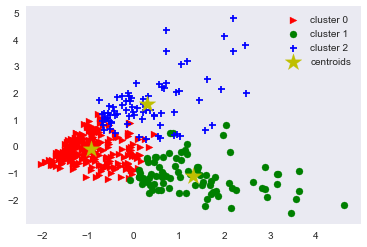

In [38]:
# クラスタごとにサンプルの散布図とクラスタの中心をプロット
# 第3主成分までの平面上にプロット


### 4.6.2 学習結果の解釈

#### 問題22: クラスタの意味付け

主成分の意味付けを参考に､各クラスタにも意味付けをしていきます｡  
ただし､意味付けは以下の結果に対して行うとします（k-means法の結果は初期値によって変わるので）｡

<img src='https://s3.us-east-2.amazonaws.com/ai.standard/Machine+Learning/Machine+Learning/vol.13+%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88+2018-01-04+3.18.06.png
' width=40%>

### 4.6.3 学習結果の可視化

#### 参考: 3次元空間へのプロット

3次元のプロットも行うことが出来ます｡みなさんも今後利用する機会があるかもしれませんので､関数を作っておきました｡

In [40]:
# (クラスタの数, 学習器, 学習データ)
def clustering_3d(n_clusters, km, X):
    # 3次元のプロットをするためのライブラリを読み込み
    from mpl_toolkits.mplot3d import Axes3D
    
    # Axes3Dのインスタンスを生成
    ax = Axes3D(plt.figure(figsize=(8, 5)))
    
    # k-means法で学習を行う
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        ax.scatter3D(X[y_km==i,0],
                     X[y_km==i,1],
                     X[y_km==i,2],
                     color=color,# プロットの色
                     marker=marker, # プロットの形
                     label='cluster ' + str(i), # ラベル
                    )

    # クラスタの中心をプロット
    ax.scatter3D(km.cluster_centers_[:, 0], # x方向の軸の値
                 km.cluster_centers_[:, 1], # y方向の軸の値
                 km.cluster_centers_[:,2],  # z方向の軸の値
                 color='y',                 # プロットの色
                 marker='*',                # プロットの形
                 label='centroids',         # ラベル
                 s=300,                     # プロットのサイズを大きくして見やすくする
                )
    
    plt.legend()
    plt.grid()

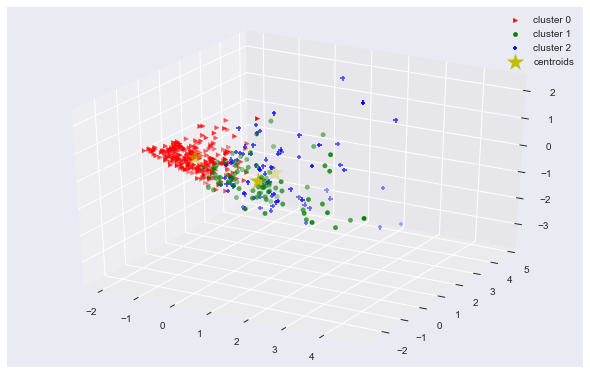

In [41]:
# クラスタリングの結果を3次元空間にプロット
clustering_3d(n_clusters=3, km=km, X=X_pca_within_std[:,0:3])
plt.show()

#### 問題23: エルボー法による最適なクラスタ数の探索

続いて､エルボー法によって最適なクラスタ数の検討をつけます｡

In [42]:
# エルボー法による､適切なkの値の探索






















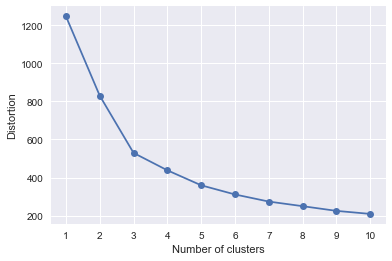

In [43]:
# エルボー法


エルボー法の結果を見ると､クラスタの数は3つにするのが良いようです｡

#### 問題24: シルエット図を出力してください｡

In [44]:
from sklearn.metrics import silhouette_samples
# 全サンプルのシルエット係数を計算
# (X, y_km, 利用する距離の種類)
# 'euclidiean' はユークリッド距離
s = 

In [45]:
# シルエット図を出力

































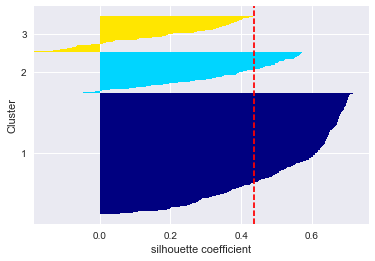

In [46]:
# シルエット図を出力


シルエット図を見ると､クラスタリングはあまり上手くいっていないことがわかります｡**<font color='red'>サンプル数にばらつきがありますし</font>**､**<font color='red'>シルエット係数がマイナスのものも多くあります</font>**｡クラスタ0のサンプル数がその他のクラスタの3倍近くありますので､これらは**かなり密集して存在している**こともわかります｡   

この数値を正確に割り出してみましょう｡k-means法によって付与されたクラスタのラベルが､**km.labels\_**を参照することでわかります｡その中に0､1､2が何個ずつあるかを**where**メソッドで数えれば出力できます｡ただし､このとき**whereメソッドの出力はタプルになっており､その第1成分がindexのアレイである**ことに注意してください｡

In [47]:
# k-meansによるクラスタのラベル
km.labels_[:5]

array([0, 1, 1, 0, 2], dtype=int32)

In [48]:
# 条件指定で､クラスタ0に属するとされたサンプルのインデックスを出力する
# タプル形式になっており､第1成分が
np.where(km.labels_==0)

(array([  0,   3,   5,   6,   7,   8,  11,  15,  17,  19,  20,  21,  24,
         25,  26,  29,  30,  31,  33,  34,  40,  43,  48,  49,  53,  56,
         57,  58,  59,  61,  62,  64,  65,  68,  70,  71,  72,  74,  75,
         76,  79,  80,  82,  84,  85,  88,  89,  90,  91,  92,  95,  97,
         98, 101, 103, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116,
        121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 136,
        137, 139, 140, 141, 143, 144, 145, 146, 147, 150, 151, 153, 154,
        155, 157, 160, 161, 162, 165, 167, 170, 171, 172, 173, 175, 176,
        177, 178, 182, 183, 185, 188, 189, 190, 194, 195, 197, 198, 199,
        201, 202, 203, 207, 209, 210, 211, 212, 213, 214, 215, 217, 218,
        219, 220, 221, 223, 224, 225, 226, 227, 228, 232, 233, 234, 236,
        237, 238, 239, 240, 241, 245, 246, 249, 250, 251, 252, 258, 259,
        260, 261, 263, 264, 267, 268, 269, 270, 275, 276, 277, 279, 280,
        281, 283, 284, 285, 286, 287, 288, 289, 291

In [49]:
print(len(np.where(km.labels_==0)[0]))
print(len(np.where(km.labels_==1)[0]))
print(len(np.where(km.labels_==2)[0]))

262
88
77


## 4.7 分析結果のレポーティング

以上の分析結果を踏まえて､この企業への提言を行ってみましょう｡機械学習の手法によって抽出された**｢知識｣**を**｢知恵｣**へと昇華させます｡機械学習の第1章で､**<font color=red>データは知恵に昇華されて初めて役に立つ</font>**ということを念を押してお伝えしました｡ここでは､そのステップの実践を行い､この課題の締めくくりとしましょう｡以下に示す雛形に従って分析レポートを書いてください｡  

<img src='https://s3.us-east-2.amazonaws.com/ai.standard/Machine+Learning/Machine+Learning/%E7%AC%AC%E4%B8%80%E7%AB%A0+%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%A8%E3%81%AF/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88+2017-07-12+1.38.05.png' width=70%>

#### 問題25: 分析レポーティング

以下の雛形に従って､これまでの分析結果をレポーティングしてください｡**<font color='red'>簡潔に､相手の目標から逆算して､相手の聞きたいことに応える書き方を目指しましょう</font>**｡

### 分析レポート

#### 1. 提案の要約
**レポートの要約を100文字以内で述べなさい｡**  

#### 2. 環境
**既存店舗の売上構成から､市場がどのような環境にあるかを700文字以内で述べなさい｡**  

#### 3. 機会
**新たに店舗を出店する際､高い売上を実現するための機会となりうることについて､300文字以内で述べなさい｡**  

<div style="text-align: center;">
STANDARD株式会社 © 2017 All Rights Reserved  
</div>
<div style="text-align: center;">  
監修: 東京女子大学情報処理センター 浅川伸一
</div>